In [1]:
import pandas as pd

# Data
* simple example
* fake news data

In [2]:
data_dict = {'label':['china','china','china','not china'],
            'text':['Chinese Beijing Chinese apple','Chinese Chinese Shanghai',
                    'Chinese Macao','Tokyo Japan Chinese']}
df = pd.DataFrame.from_dict(data_dict)
df.head()

,label,text
0,china,Chinese Beijing Chinese apple
1,china,Chinese Chinese Shanghai
2,china,Chinese Macao
3,not china,Tokyo Japan Chinese


In [4]:
df = pd.read_csv("fake_or_real_news.csv")
df = df[['label','text']]
df.head()

,label,text
0,FAKE,"Daniel Greenfield, a Shillman Journalism Fello..."
1,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,REAL,U.S. Secretary of State John F. Kerry said Mon...
3,FAKE,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,REAL,It's primary day in New York and front-runners...


# Data preparation

In [5]:
# create label IDs
df['label_id'] =df['label'].factorize()[0]

# dataframe for going from labels to label ID
label_id_df = df[['label', 'label_id']].drop_duplicates().sort_values('label_id')


# dictionaries for going between labels and IDs
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id', 'label']].values)

id_to_label


{0: 'FAKE', 1: 'REAL'}

# view the balance of classes

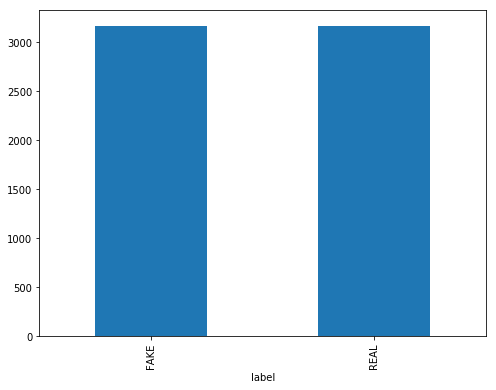

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,6))
df.groupby('label').text.count().plot.bar(ylim=0)
plt.show()

# Term frequency inverse document frequency

* Term frequency (tf) for a document and a term is just the number of times the term appears in the document
* inverse document frequency (idf) for a term (t) is defined as
$$ \log \left(\frac{N}{\text{Number of documents containing the term} } \right)$$
where $N$ is the number of documents.
* For a given term and document, $tf \cdot idf$ gives a measure of how important the term is to the document.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer



tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm=None, encoding='latin-1', ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(df.text).toarray()
labels = df.label_id

pd.DataFrame(features,columns=tfidf.get_feature_names()).head()

,00,00 00,00 et,00 pm,000,000 000,000 according,000 american,000 americans,000 asylum,...,zone syria,zones,zones confuse,zones instead,zoning,zoo,zucker,zuckerberg,zuesse,état
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.640861,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Naiave Bayes

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [9]:
correct = 0
for i in range(len(X_test)):
    if y_test.iloc[i] in clf.predict(count_vect.transform([X_test.iloc[i]])):
        correct += 1
    print(y_test.iloc[i], clf.predict(count_vect.transform([X_test.iloc[i]])), correct/(i+1))

REAL ['REAL'] 1.0
FAKE ['REAL'] 0.5
FAKE ['FAKE'] 0.6666666666666666
FAKE ['REAL'] 0.5
REAL ['REAL'] 0.6
REAL ['REAL'] 0.6666666666666666
FAKE ['REAL'] 0.5714285714285714
FAKE ['REAL'] 0.5
FAKE ['REAL'] 0.4444444444444444
FAKE ['REAL'] 0.4
REAL ['REAL'] 0.45454545454545453
FAKE ['FAKE'] 0.5
FAKE ['REAL'] 0.46153846153846156
REAL ['REAL'] 0.5
FAKE ['FAKE'] 0.5333333333333333
REAL ['REAL'] 0.5625
FAKE ['FAKE'] 0.5882352941176471
FAKE ['REAL'] 0.5555555555555556
REAL ['REAL'] 0.5789473684210527
FAKE ['REAL'] 0.55
FAKE ['REAL'] 0.5238095238095238
REAL ['REAL'] 0.5454545454545454
REAL ['REAL'] 0.5652173913043478
FAKE ['REAL'] 0.5416666666666666
REAL ['REAL'] 0.56
REAL ['REAL'] 0.5769230769230769
REAL ['REAL'] 0.5925925925925926
REAL ['REAL'] 0.6071428571428571
REAL ['REAL'] 0.6206896551724138
REAL ['REAL'] 0.6333333333333333
FAKE ['REAL'] 0.6129032258064516
FAKE ['FAKE'] 0.625
REAL ['REAL'] 0.6363636363636364
FAKE ['REAL'] 0.6176470588235294
FAKE ['FAKE'] 0.6285714285714286
REAL ['REAL'] 0.

FAKE ['REAL'] 0.6702127659574468
FAKE ['REAL'] 0.6678445229681979
REAL ['REAL'] 0.6690140845070423
REAL ['REAL'] 0.6701754385964912
REAL ['REAL'] 0.6713286713286714
REAL ['REAL'] 0.6724738675958188
REAL ['REAL'] 0.6736111111111112
REAL ['REAL'] 0.6747404844290658
REAL ['REAL'] 0.6758620689655173
FAKE ['REAL'] 0.6735395189003437
REAL ['REAL'] 0.6746575342465754
REAL ['REAL'] 0.6757679180887372
FAKE ['REAL'] 0.673469387755102
REAL ['REAL'] 0.6745762711864407
REAL ['REAL'] 0.6756756756756757
FAKE ['REAL'] 0.6734006734006734
FAKE ['REAL'] 0.6711409395973155
FAKE ['REAL'] 0.6688963210702341
REAL ['REAL'] 0.67
FAKE ['REAL'] 0.6677740863787376
FAKE ['REAL'] 0.6655629139072847
FAKE ['REAL'] 0.6633663366336634
REAL ['REAL'] 0.6644736842105263
FAKE ['REAL'] 0.6622950819672131
REAL ['REAL'] 0.6633986928104575
FAKE ['REAL'] 0.6612377850162866
FAKE ['REAL'] 0.6590909090909091
FAKE ['REAL'] 0.656957928802589
REAL ['REAL'] 0.6580645161290323
FAKE ['FAKE'] 0.6591639871382636
FAKE ['REAL'] 0.6570512820

FAKE ['REAL'] 0.6660447761194029
REAL ['REAL'] 0.6666666666666666
REAL ['FAKE'] 0.6654275092936803
FAKE ['FAKE'] 0.6660482374768089
REAL ['REAL'] 0.6666666666666666
FAKE ['REAL'] 0.6654343807763401
FAKE ['REAL'] 0.6642066420664207
REAL ['REAL'] 0.6648250460405156
FAKE ['FAKE'] 0.6654411764705882
FAKE ['FAKE'] 0.6660550458715596
FAKE ['REAL'] 0.6648351648351648
REAL ['REAL'] 0.6654478976234004
FAKE ['REAL'] 0.6642335766423357
FAKE ['FAKE'] 0.6648451730418944
REAL ['REAL'] 0.6654545454545454
REAL ['REAL'] 0.6660617059891107
REAL ['REAL'] 0.6666666666666666
FAKE ['REAL'] 0.6654611211573237
REAL ['REAL'] 0.6660649819494585
REAL ['REAL'] 0.6666666666666666
FAKE ['FAKE'] 0.6672661870503597
FAKE ['REAL'] 0.6660682226211849
REAL ['REAL'] 0.6666666666666666
FAKE ['FAKE'] 0.667262969588551
REAL ['REAL'] 0.6678571428571428
FAKE ['REAL'] 0.6666666666666666
REAL ['REAL'] 0.6672597864768683
FAKE ['REAL'] 0.6660746003552398
FAKE ['REAL'] 0.6648936170212766
FAKE ['REAL'] 0.6637168141592921
REAL ['REAL

REAL ['REAL'] 0.6674816625916871
FAKE ['REAL'] 0.6666666666666666
FAKE ['REAL'] 0.6658536585365854
FAKE ['FAKE'] 0.6662606577344702
REAL ['REAL'] 0.6666666666666666
REAL ['REAL'] 0.6670716889428918
FAKE ['REAL'] 0.6662621359223301
REAL ['REAL'] 0.6666666666666666
REAL ['REAL'] 0.6670702179176755
REAL ['REAL'] 0.6674727932285369
REAL ['REAL'] 0.6678743961352657
REAL ['REAL'] 0.6682750301568154
FAKE ['REAL'] 0.6674698795180722
FAKE ['REAL'] 0.6666666666666666
FAKE ['REAL'] 0.6658653846153846
FAKE ['REAL'] 0.6650660264105642
FAKE ['REAL'] 0.6642685851318945
FAKE ['FAKE'] 0.6646706586826348
FAKE ['REAL'] 0.6638755980861244
FAKE ['REAL'] 0.6630824372759857
FAKE ['REAL'] 0.662291169451074
FAKE ['REAL'] 0.6615017878426699
REAL ['REAL'] 0.6619047619047619
REAL ['REAL'] 0.6623067776456599
FAKE ['REAL'] 0.661520190023753
REAL ['REAL'] 0.6619217081850534
FAKE ['FAKE'] 0.6623222748815166
FAKE ['REAL'] 0.6615384615384615
REAL ['REAL'] 0.6619385342789598
REAL ['REAL'] 0.6623376623376623
REAL ['REAL'

FAKE ['REAL'] 0.6642201834862386
FAKE ['REAL'] 0.6636113657195234
FAKE ['REAL'] 0.663003663003663
REAL ['REAL'] 0.6633119853613907
REAL ['REAL'] 0.6636197440585009
REAL ['REAL'] 0.6639269406392694
FAKE ['REAL'] 0.6633211678832117
FAKE ['FAKE'] 0.6636280765724704
REAL ['REAL'] 0.6639344262295082
REAL ['REAL'] 0.6642402183803457
REAL ['REAL'] 0.6645454545454546
FAKE ['REAL'] 0.6639418710263397
REAL ['REAL'] 0.6642468239564429
FAKE ['REAL'] 0.6636446056210336
REAL ['REAL'] 0.6639492753623188
REAL ['REAL'] 0.6642533936651583
REAL ['REAL'] 0.6645569620253164
FAKE ['FAKE'] 0.6648599819331527
REAL ['REAL'] 0.6651624548736462
FAKE ['FAKE'] 0.6654643823264202
FAKE ['REAL'] 0.6648648648648648
REAL ['REAL'] 0.6651665166516652
FAKE ['REAL'] 0.664568345323741
FAKE ['REAL'] 0.6639712488769093
REAL ['REAL'] 0.6642728904847397
FAKE ['REAL'] 0.6636771300448431
FAKE ['FAKE'] 0.6639784946236559
REAL ['REAL'] 0.6642793196060878
REAL ['REAL'] 0.6645796064400715
FAKE ['REAL'] 0.6639857015192135
FAKE ['REAL'

FAKE ['FAKE'] 0.661560904449307
FAKE ['REAL'] 0.6610787172011662
FAKE ['REAL'] 0.6605972323379461
REAL ['REAL'] 0.660844250363901
REAL ['REAL'] 0.6610909090909091
FAKE ['REAL'] 0.6606104651162791
FAKE ['REAL'] 0.6601307189542484
FAKE ['FAKE'] 0.660377358490566
REAL ['REAL'] 0.6606236403190718
FAKE ['FAKE'] 0.6608695652173913
REAL ['REAL'] 0.6611151339608979
REAL ['REAL'] 0.6613603473227206
REAL ['REAL'] 0.6616052060737527
REAL ['REAL'] 0.661849710982659
REAL ['REAL'] 0.6620938628158844
REAL ['REAL'] 0.6623376623376623
REAL ['REAL'] 0.6625811103100216
FAKE ['REAL'] 0.6621037463976945
FAKE ['REAL'] 0.6616270698344132
REAL ['REAL'] 0.6618705035971223
FAKE ['FAKE'] 0.6621135873472322
REAL ['REAL'] 0.6623563218390804
REAL ['REAL'] 0.6625987078248384
REAL ['REAL'] 0.6628407460545194
REAL ['REAL'] 0.6630824372759857
REAL ['REAL'] 0.663323782234957
REAL ['REAL'] 0.6635647816750179
FAKE ['REAL'] 0.6630901287553648
REAL ['REAL'] 0.6633309506790565
REAL ['REAL'] 0.6635714285714286
REAL ['REAL'] 0

# Compare Accuracy of Log-linear model to Naive Bayes

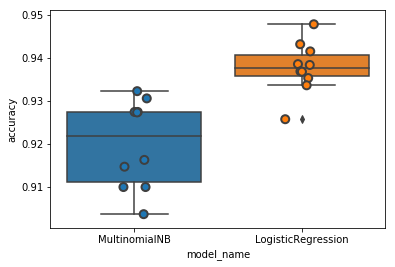

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
models = [
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# Graph the trials

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [136]:
cross_val_score?

In [ ]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_id_df.Product.values, yticklabels=label_id_df.text.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
